#### Hi all.  🙋

#### We continue our **Beginner-Intermediate Friendly Machine Learning series**, which would help anyone who wants to learn or refresh the basics of ML.

#### What we have covered: 

#### [Beginner Friendly Detailed Explained EDAs – For anyone at the beginnings of DS/ML journey](https://www.kaggle.com/general/253911#1393015) ✔️

#### [BIAS & VARIANCE TRADEOFF](https://www.kaggle.com/kaanboke/ml-basics-bias-variance-tradeoff) ✔️

#### [LINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/ml-basics-linear-algorithms)  ✔️

#### [NONLINEAR ALGORITHMS](https://www.kaggle.com/kaanboke/nonlinear-algorithms)  ✔️

#### [The Most Used Methods to Deal with MISSING VALUES](https://www.kaggle.com/kaanboke/the-most-used-methods-to-deal-with-missing-values)  ✔️

#### [Beginner Friendly End to End ML Project- Classification with Imbalanced Data](https://www.kaggle.com/kaanboke/beginner-friendly-end-to-end-ml-project-enjoy)  ✔️

#### [How to Prevent the Data Leakage ?](https://www.kaggle.com/kaanboke/how-to-prevent-the-data-leakage) ✔️

#### [The Most Common EVALUATION METRICS- A Gentle Intro](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro) ✔️

#### [Feature Selection-The Most Common Methods to Know](https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know) ✔️


#### In this notebook we will  implement **End to End Prediction Model** by using different ML algorithms**
#### Enjoy 🤘

![](https://media.giphy.com/media/3ov9jWu7BuHufyLs7m/giphy.gif?cid=ecf05e47q8liqtbxy73738g13h2ofqf9nm9q82lm3py081io&rid=giphy.gif&ct=g)

gif credit: https://giphy.com/gifs/girl-life-car-3ov9jWu7BuHufyLs7m

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [Data](#0)
* [What Problem We Have and Which Metric to Use?](#1)

* [Exploratory Data Analysis](#2)
    * [Target Variable](#3)
    * [Numerical Features](#4)
    * [Categorical Features](#5)    
    
* [Model Selection](#6)    
    * [Baseline Model](#7)
    * [Models with Ridge & Lasso & ElasticNet and KNN](#8)
    * [Models with Random Forest & Extra Trees & Gradient Boosting & XGBoost](#9)    
    * [Best Model with Hyperparameter Tuning](#10)
    * [Feature Importance](#11)    


* [Conclusion](#12)

* [References & Further Reading](#13)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

# Car Price Prediction Data

DATA DICTONARY						
						
1	**Car_ID**: 			Unique id of each observation 		
2	**Symboling**:  			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 		
3	**carCompany**: 			Name of car company 		
4	**fueltype**:			Car fuel type i.e gas or diesel 		
5	**aspiration**:			Aspiration used in a car 		
6	**doornumber**:			Number of doors in a car		
7	**carbody**:			body of car 		
8	**drivewheel**:			type of drive wheel		
9	**enginelocation**:			Location of car engine		
10	**wheelbase**:			Weelbase of car (		
11	**carlength**:			Length of car 		
12	**carwidth**:			Width of car 		
13	**carheight**:			height of car		
14	**curbweight**:			The weight of a car without occupants or baggage. 		
15	**enginetype**:			Type of engine. 		
16	**cylindernumber**:			cylinder placed in the car 		
17	**enginesize**:			Size of car 		
18	**fuelsystem**:			Fuel system of car 		
19	**boreratio**:			Boreratio of car 		
20	**stroke**:			Stroke or volume inside the engine 		
21	**compressionratio**:			compression ratio of car 		
22	**horsepower**:			Horsepower 		
23	**peakrpm**:			car peak rpm 	
24	**citympg**:			Mileage in city 		
25	**highwaympg**:			Mileage on highway 		
26	**price**: 			Price of car 		

Reference: https://www.kaggle.com/hellbuoy/car-price-prediction

<a id="1"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have and Which Metric to Use?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Based on the data and data dictionary, We have prediction / regression problem.
- We wil make prediction on the target variable **PRICE**
- And we will build a model to get best prediction on the price variable.
- For that we will use RMSE(Root Mean Squared Error) and R2
- [For the detailed info about the evaluation metrics](https://www.kaggle.com/kaanboke/the-most-common-evaluation-metrics-a-gentle-intro)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>Exploratory Data Analysis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- Let's import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance


import optuna

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- Overall data types seems ok. 

In [4]:
df.duplicated().sum()

0

In [5]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


- No missing values and no duplicates. Hurray!!!

In [6]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- There is no zero variance variable. 
- Car ID column is repetition of the index. So I'll drop it.
- Carname has 147 different entity. I'll check it. And try to find a way to reduce the variance.
- Other than that there is no problem.

- Let's make a copy of the dataset and start to work on it.

In [7]:
df1= df.copy()

-Before moving forward, I'll handle the 'carname'

In [8]:
df1['CarName'].sample(5)

154    toyota corolla 1600 (sw)
152         toyota corolla 1200
179               toyota corona
96                 nissan latio
70                buick skyhawk
Name: CarName, dtype: object

In [9]:
df1['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

- I'll use only the brands/make not the models.
- I have seen several typos, I'll handle those.

In [10]:
df1['model'] = [x.split()[0] for x in df1['CarName']]
df1['model'] = df1['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})


- Let's drop the 'model' and 'carid' columns

In [11]:
df1= df1.drop(['car_ID','CarName'], axis=1)

In [12]:
print (f' We have {df1.shape[0]} instances with the {df1.shape[1]-1} features and 1 output variable')

 We have 205 instances with the 24 features and 1 output variable


In [13]:
numerical= df1.drop(['price'], axis=1).select_dtypes('number').columns

categorical = df1.select_dtypes('object').columns

print(f'Numerical Columns:  {df1[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df1[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


Categorical Columns: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'model'],
      dtype='object')


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [14]:
df1['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [15]:
print( f"Skewness: {df1['price'].skew()}")

Skewness: 1.7776781560914454


In [16]:
df1['price'].iplot(kind='hist')

- Even though target variable has right skewness, I will not make any transformation on it.


- Let's see the numerical features

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [17]:
df1[numerical].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [18]:
df1[numerical].iplot(kind='hist');

In [19]:
df1[numerical].iplot(kind='histogram',subplots=True,bins=50)


- Several features have gaussian-normal like ditsribution.
- I have also observed skewness.
- I'll look those in details.

In [20]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df1[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

compressionratio    2.610862
enginesize          1.947655
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
dtype: float64

In [21]:
df1[skew_cols.index].iplot(kind='hist');

In [22]:
df1[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)


- Since this is a beginner friendly notebook, let's see several options in the practice without touching our main dataset.
- First I'll show np.log method.
- Then I'll use transformation methods.

### With np.log

In [23]:
df_try = df1.copy()

for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)

print(df_try[skew_cols.index].skew())
print()

df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

compressionratio    2.379056
enginesize          0.864706
horsepower          0.489938
wheelbase           0.885024
carwidth            0.815331
dtype: float64



### With Power Transformer

In [24]:
df_trans = df1[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

compressionratio    0.034222
enginesize         -0.002542
horsepower          0.049318
wheelbase          -0.003485
carwidth            0.108217
dtype: float64



- During the modelling process, we can use power transformer.

- Let's observe the correlation among the numerical features
- And also observe the correlation with the target variable

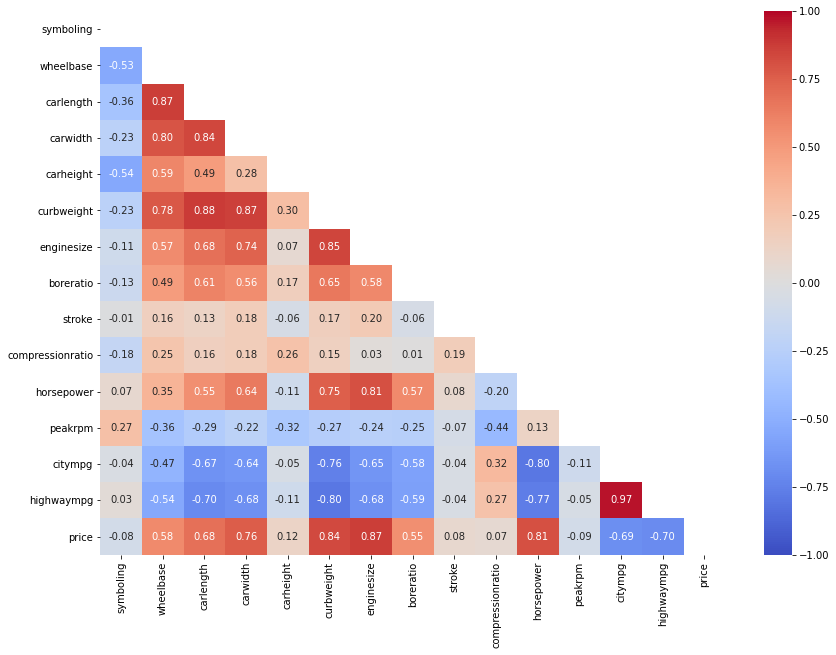

In [25]:
numerical1= df1.select_dtypes('number').columns


matrix = np.triu(df1[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df1[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

- We have 9 numerical features which have more than .5 correlation with the price variable.
- Which is a good sign for the prediction capability of the model, but still we need to see in the practice.
- From the threshold .9 perspective: Highwaympg and citympg has .97 correlation. We can drop one of them to avoid multicollinearity problems for the linear models.
- I have observed several highly correlated features below the .9 level.

- Let's drop the 'citympg'

In [26]:
df1 = df1.drop('citympg',axis=1)

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Categorical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [27]:
df1[categorical].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,model
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


### Fuel Type & Price

In [28]:
print(df1.groupby('fueltype')['price'].mean().sort_values())
print()
df1.groupby('fueltype')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

fueltype
gas       12999.7982
diesel    15838.1500
Name: price, dtype: float64



- Diesel cars are more expensive than cars with gas.

### Aspiration & Price

In [29]:
print(df1.groupby('aspiration')['price'].mean().sort_values())
print()
df1.groupby('aspiration')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64



Turbo aspiration is more expensive than standard aspiration

### Carbody & Price

In [30]:
print(df1.groupby('carbody')['price'].mean().sort_values())
print()
df1.groupby('carbody')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

carbody
hatchback      10376.652386
wagon          12371.960000
sedan          14344.270833
convertible    21890.500000
hardtop        22208.500000
Name: price, dtype: float64



- Based on the price, there are differences among the carbody.
- While Wagon cars the leats expensive ones, hardtop and the convertibles are the most expensive ones.

### Drivewheel & Price

In [31]:
print(df1.groupby('drivewheel')['price'].mean().sort_values())
print()
df1.groupby('drivewheel')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

drivewheel
fwd     9239.308333
4wd    11087.463000
rwd    19910.809211
Name: price, dtype: float64



- Rear wheel drive cars are the most expensive ones.  Front wheel cars the least expensive ones.

### Engine location & Price

In [32]:
print(df1.groupby('enginelocation')['price'].mean().sort_values())
print()
df1.groupby('enginelocation')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

enginelocation
front    12961.097361
rear     34528.000000
Name: price, dtype: float64



- There is a quite difference based on the engine location. Rear engine location almost 3 times expensive than front ones.

### Engine type & Price

In [33]:
print(df1.groupby('enginetype')['price'].mean().sort_values())
print()
df1.groupby('enginetype')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64



- Our dataset has 7 different engine types and price changes amongs them significantly.

### Fuel system & Price

In [34]:
print(df1.groupby('fuelsystem')['price'].mean().sort_values())
print()
df1.groupby('fuelsystem')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

fuelsystem
2bbl     7478.151515
1bbl     7555.545455
spdi    10990.444444
spfi    11048.000000
4bbl    12145.000000
mfi     12964.000000
idi     15838.150000
mpfi    17754.602840
Name: price, dtype: float64



- Our dataset has 8 different fuel system and price changes amongs them significantly.

### Model & Price

In [35]:
print(df1.groupby('model')['price'].mean().sort_values())
print()
df1.groupby('model')['price'].mean().iplot(kind='histogram',subplots=True,bins=50)

model
chevrolet       6007.000000
dodge           7875.444444
plymouth        7963.428571
honda           8184.692308
subaru          8541.250000
isuzu           8916.500000
mitsubishi      9239.769231
renault         9595.000000
Toyota          9885.812500
Volkswagen     10077.500000
Nissan         10415.666667
Mazda          10652.882353
saab           15223.333333
peugeot        15489.090909
alfa-romero    15498.333333
mercury        16503.000000
audi           17859.166714
volvo          18063.181818
bmw            26118.750000
Porsche        31400.500000
buick          33647.000000
jaguar         34600.000000
Name: price, dtype: float64



- Based on the model, Porsche, Buick and Jaguar are the most expensive ones.
- Chevroletis the least expensive model.

### Get the Dummies

In [36]:
df2 = pd.get_dummies(df1, columns=categorical, drop_first=True)
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,model_Nissan,model_Porsche,model_Toyota,model_Volkswagen,model_alfa-romero,model_audi,model_bmw,model_buick,model_chevrolet,model_dodge,model_honda,model_isuzu,model_jaguar,model_mercury,model_mitsubishi,model_peugeot,model_plymouth,model_renault,model_saab,model_subaru,model_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>MODEL SELECTION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- I'll use linear regression model as a base model
- And then I will use Ridge, Lasso, Elasticnet, KNeighborsRegressor and Support Vector MAchine Regressor
- And then i will use ensemble models, like Randomforest, Gradient Boosting and Extra Trees
-  Finally I will look at the XGBoost Regresson.
- And after evaluating the algorithm, we will select our best model.
- Let's start.

<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Baseline Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [37]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print (f'model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}')




model : LinearRegression() and  rmse score is : 2650.560337022368, r2 score is 0.8985995076954822


- Baseline Model,in our case, Linear Regression model, without and scaling and transformation did a quite a good job.

<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Ridge &  Lasso  &  Elasticnet  &  KNN with Scaler and Transformer</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [38]:
rmse_test =[]
r2_test =[]
model_names =[]

numerical2= df2.drop(['price'], axis=1).select_dtypes('number').columns

X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

s = StandardScaler()
p= PowerTransformer(method='yeo-johnson', standardize=True)

rr = Ridge()
las = Lasso()
el= ElasticNet()
knn = KNeighborsRegressor()

models = [rr,las,el,knn]

for model in models:
    ct = make_column_transformer((s,numerical2),(p,skew_cols.index),remainder='passthrough')  
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),2)}')

model_names = ['Ridge','Lasso','ElasticNet','KNeighbors']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : Ridge() and  rmse score is : 2412.48, r2 score is 0.92
model : Lasso() and  rmse score is : 2307.47, r2 score is 0.92
model : ElasticNet() and  rmse score is : 3394.06, r2 score is 0.83
model : KNeighborsRegressor() and  rmse score is : 4008.29, r2 score is 0.77


,RMSE,R2_Test
Ridge,2412.48,0.92
Lasso,2307.47,0.92
ElasticNet,3394.06,0.83
KNeighbors,4008.29,0.77


- By using standard scaler and power transformer for the skewness;
- For linear models we got .92 for the R2 and
- 2307.47 RMSE which are better scores compare to the baseline model.

<a id="9"></a>
<font color="lightseagreen" size=+1.5><b>Random Forest& Gradient Boosting & Extra Trees & XGBoost</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [39]:
rmse_test =[]
r2_test =[]
model_names =[]



X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

models = [rf,gb,et,xgb]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    r2_test.append(round(r2_score(y_test, y_pred),2))
    print (f'model : {model} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

model_names = ['RandomForest','GradientBoost','ExtraTree','XGB']
result_df = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index=model_names)
result_df

model : RandomForestRegressor(random_state=42) and  rmse score is : 1984.44, r2 score is 0.9432
model : GradientBoostingRegressor(random_state=42) and  rmse score is : 2422.19, r2 score is 0.9153
model : ExtraTreesRegressor(random_state=42) and  rmse score is : 2641.67, r2 score is 0.8993
model : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) and  rmse score is : 2416.1, r2 score is 0.9157


,RMSE,R2_Test
RandomForest,1984.44,0.94
GradientBoost,2422.19,0.92
ExtraTree,2641.67,0.90
XGB,2416.10,0.92


- Now we are talking.
- Random forest, without any tuning got .94 R2 and lowest RMSE.
- XGBoost also did a good job without any optimization / tuning.

<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Best Model with the Hyperparameter Tuning</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [40]:
X= df2.drop('price', axis=1)
y= df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators= 220, random_state=42 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print (f' rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),4)}, r2 score is {round(r2_score(y_test, y_pred),4)}')




 rmse score is : 1975.8483, r2 score is 0.9437


- With hyperparameter tuning we got a lift. 
- RMSE (from 1984.44 to 1975.8483)
- R2 (from .9432 to .9437)

<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Feature Importance</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

symboling : 0.001
wheelbase : 0.008
carlength : 0.013
carwidth : 0.024
carheight : 0.004
curbweight : 0.167
enginesize : 0.6
boreratio : 0.005
stroke : 0.003
compressionratio : 0.005
horsepower : 0.028
peakrpm : 0.005
highwaympg : 0.118
enginetype_ohc : 0.001
model_bmw : 0.006



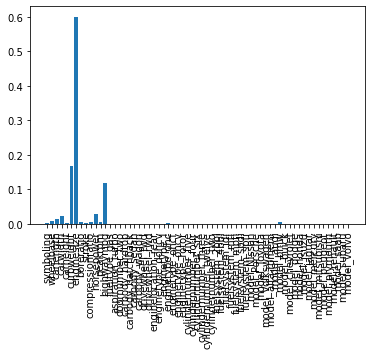

In [41]:
importances = rf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

# what are scores for the features
for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.001:
        print(f'{X_train.columns[i]} : {round(rf.feature_importances_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.show()

- Based on the Random Forest Regressor:
   - **enginesize**
   - **curbweight**
   - **highway mpg**
   - **horse power**
- have biggest importance scores.


- It is important to note that Random Forest Regressor gave importance score bigger than 0 to 16 features.
- Model used 16 out of 63 features to get best prediction.
- For [For deatiled discussion on the Feature Selection-The Most Common Methods to Know](https://www.kaggle.com/kaanboke/feature-selection-the-most-common-methods-to-know)

<a id="12"></a>
<font color="darkblue" size=+1.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


- We have developed model to predict car price problem.

- First, we  made the detailed exploratory analysis.
- We have decided which metric to use.
- We analyzed both target and features in detail.
- We transform categorical variables into numeric so we can use them in the model.
- We transform numerical variables to reduce skewness and get close to normal  distribution.
- We use pipeline to avoid data leakage.
- We looked at the results of the each model and selected the best one for the problem in hand.
- We made hyperparameter tuning of the best model see the improvement
- We looked at the feature importance.



- After this point it is up to you to develop and improve the models.  **Enjoy** 🤘

#### By the way, when you like the topic, you can show it by supporting 👍

####  **Feel free to leave a comment**. 

#### All the best 🤘

![](https://media.giphy.com/media/3jVT4U5bilspG/giphy.gif?cid=ecf05e47ijcazulbfateoqyazwbckrtfakr1olt4krmdycsd&rid=giphy.gif&ct=g)

gif credit: https://giphy.com/

<a id="13"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)